In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv("dataset/iris.csv")

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df['species'].uniqueque()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [15]:
X = df.drop('species', axis=1)

In [16]:
# X

In [17]:
y = df['species']

In [18]:
# y

In [19]:
# One-hot encoding the target label as it is categorical
from sklearn.preprocessing import LabelBinarizer

In [20]:
encoder = LabelBinarizer()

In [21]:
y = encoder.fit_transform(y)

In [22]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [31]:
# Train test split of the dataset
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [33]:
# Scaling the data as neural network requires scaled data
from sklearn.preprocessing import MinMaxScaler

In [34]:
scalar = MinMaxScaler()

In [35]:
# Only fitting the training data as it would cause data leaking
scalar.fit(X_train)

MinMaxScaler()

In [36]:
scaled_X_train = scalar.transform(X_train)

In [37]:
scaled_X_test = scalar.transform(X_test)

In [38]:
# Building our network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [39]:
model = Sequential()

model.add(Dense(4, activation='relu', input_shape=[4,]))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
# Applying callback to avoid overfitting
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
early_stop = EarlyStopping(patience=10)

In [42]:
# Training the network
model.fit(x=scaled_X_train, y=y_train, epochs=300, validation_data=(scaled_X_test, y_test), callbacks=[early_stop])

Epoch 1/300
4/4 [==============================] - 1s 71ms/step - loss: 1.1510 - accuracy: 0.3500 - val_loss: 1.1811 - val_accuracy: 0.2667
Epoch 2/300
4/4 [==============================] - 0s 10ms/step - loss: 1.1474 - accuracy: 0.3500 - val_loss: 1.1772 - val_accuracy: 0.2667
Epoch 3/300
4/4 [==============================] - 0s 10ms/step - loss: 1.1441 - accuracy: 0.3500 - val_loss: 1.1731 - val_accuracy: 0.2667
Epoch 4/300
4/4 [==============================] - 0s 10ms/step - loss: 1.1408 - accuracy: 0.3500 - val_loss: 1.1692 - val_accuracy: 0.2667
Epoch 5/300
4/4 [==============================] - 0s 9ms/step - loss: 1.1376 - accuracy: 0.3500 - val_loss: 1.1656 - val_accuracy: 0.2667
Epoch 6/300
4/4 [==============================] - 0s 12ms/step - loss: 1.1344 - accuracy: 0.3500 - val_loss: 1.1619 - val_accuracy: 0.2667
Epoch 7/300
4/4 [==============================] - 0s 10ms/step - loss: 1.1312 - accuracy: 0.3500 - val_loss: 1.1586 - val_accuracy: 0.2667
Epoch 8/300
4/4 [====

4/4 [==============================] - 0s 9ms/step - loss: 0.9654 - accuracy: 0.4917 - val_loss: 1.0064 - val_accuracy: 0.4000
Epoch 60/300
4/4 [==============================] - 0s 9ms/step - loss: 0.9621 - accuracy: 0.5000 - val_loss: 1.0035 - val_accuracy: 0.4333
Epoch 61/300
4/4 [==============================] - 0s 9ms/step - loss: 0.9588 - accuracy: 0.5083 - val_loss: 1.0006 - val_accuracy: 0.4333
Epoch 62/300
4/4 [==============================] - 0s 9ms/step - loss: 0.9556 - accuracy: 0.5083 - val_loss: 0.9978 - val_accuracy: 0.4333
Epoch 63/300
4/4 [==============================] - 0s 9ms/step - loss: 0.9523 - accuracy: 0.5167 - val_loss: 0.9951 - val_accuracy: 0.4333
Epoch 64/300
4/4 [==============================] - 0s 9ms/step - loss: 0.9490 - accuracy: 0.5250 - val_loss: 0.9922 - val_accuracy: 0.4333
Epoch 65/300
4/4 [==============================] - 0s 9ms/step - loss: 0.9458 - accuracy: 0.5333 - val_loss: 0.9892 - val_accuracy: 0.4333
Epoch 66/300
4/4 [===============

4/4 [==============================] - 0s 7ms/step - loss: 0.7800 - accuracy: 0.7167 - val_loss: 0.8335 - val_accuracy: 0.6333
Epoch 118/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7770 - accuracy: 0.7167 - val_loss: 0.8304 - val_accuracy: 0.6333
Epoch 119/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7738 - accuracy: 0.7167 - val_loss: 0.8273 - val_accuracy: 0.6333
Epoch 120/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7708 - accuracy: 0.7167 - val_loss: 0.8241 - val_accuracy: 0.6667
Epoch 121/300
4/4 [==============================] - 0s 8ms/step - loss: 0.7678 - accuracy: 0.7167 - val_loss: 0.8211 - val_accuracy: 0.6667
Epoch 122/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7646 - accuracy: 0.7167 - val_loss: 0.8183 - val_accuracy: 0.6667
Epoch 123/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7616 - accuracy: 0.7167 - val_loss: 0.8152 - val_accuracy: 0.6667
Epoch 124/300
4/4 [========

4/4 [==============================] - 0s 6ms/step - loss: 0.6071 - accuracy: 0.7667 - val_loss: 0.6622 - val_accuracy: 0.7667
Epoch 176/300
4/4 [==============================] - 0s 7ms/step - loss: 0.6045 - accuracy: 0.7667 - val_loss: 0.6593 - val_accuracy: 0.7667
Epoch 177/300
4/4 [==============================] - 0s 6ms/step - loss: 0.6016 - accuracy: 0.7667 - val_loss: 0.6568 - val_accuracy: 0.7667
Epoch 178/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5990 - accuracy: 0.7667 - val_loss: 0.6542 - val_accuracy: 0.7667
Epoch 179/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5964 - accuracy: 0.7583 - val_loss: 0.6515 - val_accuracy: 0.7667
Epoch 180/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5938 - accuracy: 0.7583 - val_loss: 0.6486 - val_accuracy: 0.7667
Epoch 181/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5912 - accuracy: 0.7583 - val_loss: 0.6460 - val_accuracy: 0.7667
Epoch 182/300
4/4 [========

4/4 [==============================] - 0s 6ms/step - loss: 0.4804 - accuracy: 0.8167 - val_loss: 0.5313 - val_accuracy: 0.8333
Epoch 234/300
4/4 [==============================] - 0s 7ms/step - loss: 0.4788 - accuracy: 0.8167 - val_loss: 0.5297 - val_accuracy: 0.8333
Epoch 235/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4770 - accuracy: 0.8167 - val_loss: 0.5278 - val_accuracy: 0.8333
Epoch 236/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4755 - accuracy: 0.8167 - val_loss: 0.5258 - val_accuracy: 0.8333
Epoch 237/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4739 - accuracy: 0.8167 - val_loss: 0.5240 - val_accuracy: 0.8333
Epoch 238/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4723 - accuracy: 0.8167 - val_loss: 0.5223 - val_accuracy: 0.8333
Epoch 239/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4709 - accuracy: 0.8167 - val_loss: 0.5205 - val_accuracy: 0.8333
Epoch 240/300
4/4 [========

4/4 [==============================] - 0s 6ms/step - loss: 0.4075 - accuracy: 0.8500 - val_loss: 0.4529 - val_accuracy: 0.8667
Epoch 292/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4066 - accuracy: 0.8500 - val_loss: 0.4521 - val_accuracy: 0.8667
Epoch 293/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4058 - accuracy: 0.8500 - val_loss: 0.4513 - val_accuracy: 0.8667
Epoch 294/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4047 - accuracy: 0.8500 - val_loss: 0.4500 - val_accuracy: 0.8667
Epoch 295/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4037 - accuracy: 0.8500 - val_loss: 0.4487 - val_accuracy: 0.8667
Epoch 296/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4028 - accuracy: 0.8500 - val_loss: 0.4476 - val_accuracy: 0.8667
Epoch 297/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4019 - accuracy: 0.8500 - val_loss: 0.4462 - val_accuracy: 0.8667
Epoch 298/300
4/4 [========

In [28]:
metrics = pd.DataFrame(model.history.history)

In [29]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.208916,0.316667,1.169395,0.400000
1,1.201871,0.316667,1.165959,0.400000
2,1.195687,0.316667,1.162812,0.400000
3,1.189666,0.316667,1.159966,0.400000
4,1.182822,0.316667,1.156944,0.400000
...,...,...,...,...
295,0.498682,0.858333,0.531596,0.866667
296,0.497694,0.858333,0.530342,0.866667
297,0.496629,0.858333,0.529259,0.866667
298,0.495680,0.858333,0.528066,0.866667


<AxesSubplot:>

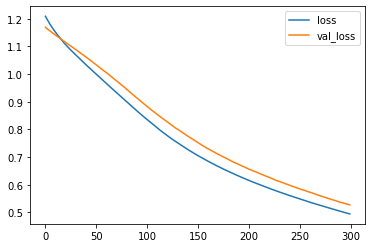

In [30]:
metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

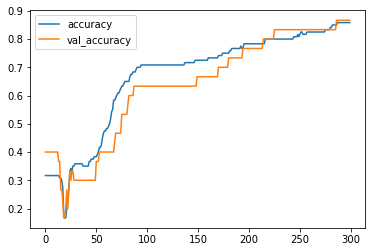

In [31]:
metrics[['accuracy', 'val_accuracy']].plot()

In [32]:
model.evaluate(scaled_X_test, y_test, verbose=0)

[0.5271013379096985, 0.8666666746139526]

In [33]:
len(metrics)

300

In [34]:
epochs = len(metrics)

In [37]:
# Now training the network on entire dataset
scaled_X = scalar.fit_transform(X)

In [38]:
model = Sequential()

model.add(Dense(4, activation='relu', input_shape=[4,]))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
model.fit(scaled_X, y, epochs=epochs)

Epoch 1/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0886 - accuracy: 0.4000
Epoch 2/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0852 - accuracy: 0.3933
Epoch 3/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0817 - accuracy: 0.4000
Epoch 4/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0786 - accuracy: 0.4067
Epoch 5/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0753 - accuracy: 0.6200
Epoch 6/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0723 - accuracy: 0.7200
Epoch 7/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0691 - accuracy: 0.6800
Epoch 8/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0662 - accuracy: 0.6867
Epoch 9/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0631 - accuracy: 0.6733
Epoch 10/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0600 - accuracy: 0.6667
Epoch 11/300
5/5 [===========

5/5 [==============================] - 0s 1ms/step - loss: 0.6180 - accuracy: 0.8267
Epoch 168/300
5/5 [==============================] - 0s 1ms/step - loss: 0.6160 - accuracy: 0.8267
Epoch 169/300
5/5 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.8267
Epoch 170/300
5/5 [==============================] - 0s 1ms/step - loss: 0.6119 - accuracy: 0.8333
Epoch 171/300
5/5 [==============================] - 0s 1ms/step - loss: 0.6099 - accuracy: 0.8333
Epoch 172/300
5/5 [==============================] - 0s 2ms/step - loss: 0.6079 - accuracy: 0.8333
Epoch 173/300
5/5 [==============================] - 0s 2ms/step - loss: 0.6059 - accuracy: 0.8333
Epoch 174/300
5/5 [==============================] - 0s 1ms/step - loss: 0.6042 - accuracy: 0.8333
Epoch 175/300
5/5 [==============================] - 0s 1ms/step - loss: 0.6020 - accuracy: 0.8333
Epoch 176/300
5/5 [==============================] - 0s 1ms/step - loss: 0.6001 - accuracy: 0.8333
Epoch 177/300
5/5 [=====

In [40]:
# Saving the model and scalar for further incoming dataset
model.save("final_iris_model.h5")

In [4]:
import joblib

In [42]:
joblib.dump(scalar, 'iris_scalar.pkl')

['iris_scalar.pkl']

In [1]:
# Loading the model and testing on new dataset
from tensorflow.keras.models import load_model

In [2]:
flower_model = load_model('final_iris_model.h5')

In [5]:
flower_scalar = joblib.load('iris_scalar.pkl')

In [23]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [26]:
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [29]:
flower_example = {"sepal_length": 5.1,
                 "sepal_width": 3.5,
                 "petal_length": 1.4,
                 "petal_width":0.2}

In [47]:
# Creating a function for prediction
def return_prediction(model, scalar, sample_json):
    
    s_len = sample_json["sepal_length"]
    s_width = sample_json["sepal_width"]
    p_len = sample_json["petal_length"]
    p_width = sample_json["petal_width"]
    
    flower = [[s_len, s_width, p_len, p_width]]
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    flower = scalar.transform(flower)
    
    class_ind = model.predict(flower)[0]
    
    class_ind= np.argmax(class_ind)
    
    return classes[class_ind]
    
    

In [48]:
return_prediction(flower_model, flower_scalar, flower_example)

'setosa'

In [49]:
# CODE FOR DEPLOYMENT

In [50]:
from tensorflow.keras.models import load_model
import joblib
import numpy as np

flower_model = load_model('final_iris_model.h5')
flower_scalar = joblib.load('iris_scalar.pkl')

def return_prediction(model, scalar, sample_json):
    
    s_len = sample_json["sepal_length"]
    s_width = sample_json["sepal_width"]
    p_len = sample_json["petal_length"]
    p_width = sample_json["petal_width"]
    
    flower = [[s_len, s_width, p_len, p_width]]
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    flower = scalar.transform(flower)
    
    class_ind = model.predict(flower)[0]
    
    class_ind= np.argmax(class_ind)
    
    return classes[class_ind]